First let's change our current working directory to the folder where the data is located using `os.chdir`

In [57]:
import os
os.chdir("E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw")

Let's confirm that the changes are in effect by checking the current working directory:

In [58]:
os.getcwd()

'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw'

Now let's open one of the newspaper's files and have a look at the contents. We'll start with the *Student Newspapers*, just because it's listed first alphabetically. We'll list all the files in the directory, open the first one and inspect the content by displaying the first 2000 characters in the file.

In [59]:
journal_name = 'Student Newspapers'
path = os.path.join(os.getcwd(), journal_name)
files = os.listdir(path)
files[:10]

['bb0001069r-1.pdf.txt',
 'bb0001070k-1.pdf.txt',
 'bb0035197d-1.pdf.txt',
 'bb0035198x-1.pdf.txt',
 'bb0035199f-1.pdf.txt',
 'bb0035200w-1.pdf.txt',
 'bb0069327q-1.pdf.txt',
 'bb00693287-1.pdf.txt',
 'bb0069329r-1.pdf.txt',
 'bb01034597-1.pdf.txt']

`os.listdir()` returns the names of the files but not their path, which we need to be able to open them. For now we'll just use `os.path.join()` again.

In [60]:
file = os.path.join(path, files[0])
with open(file, 'r') as fp:
    content = fp.read()
    
content[:2000]

UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 112: illegal multibyte sequence

Woops. Encoding error. Let's fix this by specifying the encoding

In [64]:
file = os.path.join(path, files[0])
with open(file, 'r', encoding = 'utf8') as fp:
    content = fp.read()
    
content[:2000]

'\nInleS\nvo,.2,o.t i\n\nS.D. State\nSummer\nSchool\n350 classes in 36 depart-\n\nments will be offered in San\nDiego State’s summer ses-\nsions. The courses will lead\nto bachelor of science, bache-\nlor of arts, teaching creden-\ntials and master’s degrees.\nThe intersession, first of\n\nthe three siimmor ~o~inn~\nruns from June 13 to June 24.\nStudents may earn up to two\nacademic units of credit (3\nquarter units at UCSD).\nTerm 1, a six-week session,\n\nwill follow, from June 27 to\nAugust 5, with a maximum of\nsix units of credit being of-\nfered. Registration will be\nheld on June 27.\nThe final summer session,\n\nTerm 2, will be a three-week\nsession from August 8 to\nAugust 27. Three academic\nunits may be earned. Regis-\ntration will be held on Au-\ngu st 8.\nSummer fees will be $18.50\n\nfor each semester unit, with\na parking fee of $5 required\nonly during the six week ses-\nsion, Term 1.\n\nSan Diego, California\n\nBIG MEN VOTE "NO" ON GUANO: Riparm riparia, the cliff\nsw

First, let's get rid of the hyphenation using regular expressions (for which we'll need the **re** package). We'll create a specific function for it:

In [65]:
import re
def preprocess(text):
    return re.sub('\-\n+', '', text)

content = preprocess(content)
content[:2000]

'\nInleS\nvo,.2,o.t i\n\nS.D. State\nSummer\nSchool\n350 classes in 36 departments will be offered in San\nDiego State’s summer sessions. The courses will lead\nto bachelor of science, bachelor of arts, teaching credentials and master’s degrees.\nThe intersession, first of\n\nthe three siimmor ~o~inn~\nruns from June 13 to June 24.\nStudents may earn up to two\nacademic units of credit (3\nquarter units at UCSD).\nTerm 1, a six-week session,\n\nwill follow, from June 27 to\nAugust 5, with a maximum of\nsix units of credit being offered. Registration will be\nheld on June 27.\nThe final summer session,\n\nTerm 2, will be a three-week\nsession from August 8 to\nAugust 27. Three academic\nunits may be earned. Registration will be held on Augu st 8.\nSummer fees will be $18.50\n\nfor each semester unit, with\na parking fee of $5 required\nonly during the six week session, Term 1.\n\nSan Diego, California\n\nBIG MEN VOTE "NO" ON GUANO: Riparm riparia, the cliff\nswallow, will have to find o

Now we want to be able to load all the files in the directory and apply the preprocessing to them. To do that, we'll first define a function that will return the full path of all the files in the directory and will makes sure that we are only dealing with text files (so that we don't try to open a folder or another filetype that would cause an error):

In [66]:
def load_files(directory):
    path = os.path.join(os.getcwd(), directory)
    files = os.listdir(path)
    files = [os.path.join(path, _) for _ in files if '.txt' in _]
    return files

load_files(path)[:10]

['E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0001069r-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0001070k-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035197d-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035198x-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035199f-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035200w-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0069327q-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb00693287-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHis

Once we have all the files, we'll create a new function `load_data` to each file one by one, preprocess it and store the result in memory in an array

In [67]:
def load_data(files):
    X = []
    for file in files:
        with open(file, 'r', encoding = 'utf8') as fp:
            content = fp.read()
            content = preprocess(content)
        X.append(content)
    return X

Now let's actually run the function and get the data:

In [68]:
files = load_files(journal_name)
documents = load_data(files)

In [69]:
len(documents)

646

Now we'll vectorize the documents. We'll only keep terms that appear in less than 80% of the documents and at least twice in the corpus. We'll limit the number of features to 5000.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=5000, stop_words='english')
X = vectorizer.fit_transform(documents)

Next, we'll apply non-negative matrix factorization to do topic modeling. We'll try with 25 topics first:

In [72]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=25, init = 'nndsvd').fit(X)

Let's have a look at nmf.components_ to understand the output and try to interprete the results

In [73]:
import numpy as np
np.shape(nmf.components_)

(25, 5000)

In [74]:
nmf.components_

array([[ 0.04770388,  0.02705699,  0.        , ...,  0.00333239,
         0.00721114,  0.02602281],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.00745978,  0.00579664],
       [ 0.        ,  0.        ,  0.00568511, ...,  0.        ,
         0.        ,  0.00607028],
       ..., 
       [ 0.01358303,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00883111,  0.00680038,  0.        , ...,  0.        ,
         0.00641064,  0.01085206],
       [ 0.00666498,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
nmf.components_[0].argsort()

array([2499, 2051, 2049, ..., 2602, 4747, 4960], dtype=int64)

In [76]:
vocabulary = vectorizer.get_feature_names()
print(vocabulary[2499])
print(vocabulary[4960])

item
workers


In [77]:
nmf.components_[0][2499]

0.0

In [78]:
nmf.components_[0][4960]

1.1017209030802835

In [79]:
nmf.components_[0].argsort()[::-1]

array([4960, 4747, 2602, ..., 2049, 2051, 2499], dtype=int64)

Let's now print the top 10 words for the first topic:

In [80]:
[vocabulary[i] for i in nmf.components_[0].argsort()[::-1][:10]]

['workers',
 'union',
 'labor',
 'ufw',
 'strike',
 'mexico',
 'mexican',
 'north',
 'city',
 'april']

Now let's create a function that will allow us to do that for all the topics:

In [81]:
def display_topics(model, vocabulary, no_words):
    for index, topic in enumerate(model.components_):
        print("Topic", index, ":")
        print(" ".join([vocabulary[i] for i in topic.argsort()[::-1][:no_words]]))

In [82]:
display_topics(nmf, vocabulary, 15)

Topic 0 :
workers union labor ufw strike mexico mexican north city april police company health industry border
Topic 1 :
revelle provost dean revellations quarter resident blake feb plaza argo orientation humanities spring seniors dr
Topic 2 :
ol lhc hc ill lhe ha arc ith bc thc tile ot el ihc pm
Topic 3 :
black blacks white african bsu negro dr voice king whites malcolm sisters afro brothers garvey
Topic 4 :
soviet cr review soviets reagan crocker nicaragua sandinistas communist union freedom sandinista conservative gorbachev dr
Topic 5 :
sandscript team dr hall kerr club galbraith shores freshman senate editor matthews mr freshmen sports
Topic 6 :
que en los el para las una se sus del su por es workers clue
Topic 7 :
indicator 534 info peace pm meets collective resource ch cable morley op 7pm 1990 mondays
Topic 8 :
asian islander korean japanese momentum pacific americans asians chinese ethnic culture identity 1992 stereotypes tile
Topic 9 :
daycare reg chancellor fee care communicat

Note that we can also use nmf to get the distribution of each of our topic within a specific document (what percentage of document a concerns topic 1, 2 or 3? ) by normalizing the results of the NMF over the corpus:

In [83]:
doc_topics = nmf.transform(X)

In [84]:
np.shape(doc_topics)

(646, 25)

In [85]:
doc_topics[0]

array([ 0.        ,  0.01322529,  0.        ,  0.01075261,  0.00593091,
        0.27822003,  0.        ,  0.        ,  0.00929646,  0.        ,
        0.00431371,  0.01570553,  0.01114917,  0.0077475 ,  0.00769204,
        0.01791881,  0.        ,  0.03688016,  0.0015401 ,  0.        ,
        0.01337364,  0.00523631,  0.02769023,  0.02175224,  0.01639838])

In [86]:
sum(doc_topics[0])

0.50482312014044284

In [87]:
doc_topics = doc_topics / np.sum(doc_topics, axis=1, keepdims=True)

In [88]:
doc_topics[0]

array([ 0.        ,  0.02619786,  0.        ,  0.02129977,  0.01174848,
        0.55112378,  0.        ,  0.        ,  0.01841528,  0.        ,
        0.00854499,  0.03111095,  0.02208531,  0.01534697,  0.0152371 ,
        0.03549523,  0.        ,  0.07305561,  0.00305077,  0.        ,
        0.02649174,  0.01037257,  0.05485135,  0.04308883,  0.03248341])

Now let's have a look at what metadata we can work with by opening the csv file corresponding to the corpus we're looking at. We will use the **pandas** package to load the csv file.

In [89]:
import pandas as pd
# we've stored the name of the journal in a variable earlier, we can reuse this here so that we can more easily switch to another corpus in the future
df = pd.read_csv(journal_name + '.csv')

Let's look at the columns

In [90]:
df.columns

Index(['Object Unique ID', 'Level', 'File name', 'File use',
       'Type of Resource', 'Language', 'Title', 'Subtitle', 'Translation',
       'Variant', 'Variant.1', 'Variant.2', 'Begin date', 'Date:creation',
       'End date', 'File name 2', 'File use 2', 'Identifier:filename',
       'Identifier:local', 'Note:local attribution', 'Note:note',
       'Note:note.1', 'Note:note.2', 'Note:note.3', 'Note:publication',
       'Note:publication.1', 'Note:series', 'Subject:topic'],
      dtype='object')

And the first entries...

In [91]:
df.head()

,Object Unique ID,Level,File name,File use,Type of Resource,Language,Title,Subtitle,Translation,Variant,...,Identifier:local,Note:local attribution,Note:note,Note:note.1,Note:note.2,Note:note.3,Note:publication,Note:publication.1,Note:series,Subject:topic
0,http://library.ucsd.edu/ark:/20775/bb8772477z,Object,20775-bb8772477z-0-1.pdf,document-service,text,NaN,Sandscript,NaN,NaN,NaN,...,NaN,"Special Collections & Archives, UC San Diego, ...",PDF file includes photographs,"""UCSD's first weekly student newspaper."" Frequ...",NaN,NaN,"Vol. 1, no. 1 (10 Feb. 1965)- Ceased with issu...","La Jolla, CA","Volume 1, Issue 1",NaN
1,http://library.ucsd.edu/ark:/20775/bb9352689j,Object,20775-bb9352689j-0-1.pdf,document-service,text,NaN,Sandscript,NaN,NaN,NaN,...,NaN,"Special Collections & Archives, UC San Diego, ...","""UCSD's first weekly student newspaper."" Frequ...",PDF file includes photographs,NaN,NaN,"Vol. 1, no. 1 (10 Feb. 1965)- Ceased with issu...","La Jolla, CA","Volume 1, Issue 2",NaN
2,http://library.ucsd.edu/ark:/20775/bb6007948n,Object,20775-bb6007948n-0-1.pdf,document-service,text,NaN,Sandscript,NaN,NaN,NaN,...,NaN,"Special Collections & Archives, UC San Diego, ...","""UCSD's first weekly student newspaper."" Frequ...",PDF file includes photographs,NaN,NaN,"La Jolla, CA","Vol. 1, no. 1 (10 Feb. 1965)- Ceased with issu...","Volume 1, Issue 3",NaN
3,http://library.ucsd.edu/ark:/20775/bb6622290j,Object,20775-bb6622290j-0-1.pdf,document-service,text,NaN,Sandscript,NaN,NaN,NaN,...,NaN,"Special Collections & Archives, UC San Diego, ...","""UCSD's first weekly student newspaper."" Frequ...",PDF file includes photographs,NaN,NaN,"Vol. 1, no. 1 (10 Feb. 1965)- Ceased with issu...","La Jolla, CA","Volume 1, Issue 4",NaN
4,http://library.ucsd.edu/ark:/20775/bb6758810b,Object,20775-bb6758810b-0-1.pdf,document-service,text,NaN,Sandscript,NaN,NaN,NaN,...,NaN,"Special Collections & Archives, UC San Diego, ...",PDF file includes photographs,"""UCSD's first weekly student newspaper."" Frequ...",NaN,NaN,"Vol. 1, no. 1 (10 Feb. 1965)- Ceased with issu...","La Jolla, CA","Volume 1, Issue 5",NaN


We notice that the filenames listed do not exactly correspond to the names of the raw text files we have used before, nor are they listed in the same order:

In [92]:
files[:10]

['E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0001069r-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0001070k-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035197d-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035198x-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035199f-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0035200w-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb0069327q-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHistory_raw\\Student Newspapers\\bb00693287-1.pdf.txt',
 'E:\\Code Projects\\UCSD Newspapers\\ucsdHistory_raw 2\\ucsdHis

For that reason we will need to process our filenames and match them to the appropriate row in the dataframe as well as to the appropriate topic distribution in the NMF matrix we created earlier from the corpus.

We notice that the Object Unique ID of each row can be found in the filenames of the text files we have, so let's use that to match the raw text to the rows of the csv. Let's do a test with the first file:

In [93]:
file_id = files[0].split('\\')[-1].split('-')[0]
file_id

'bb0001069r'

In [94]:
df['Object Unique ID'].str.contains(file_id)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
616    False
617    False
618    False
619    False
620    False
621    False
622    False
623    False
624    False
625    False
626    False
627    False
628    False
629    False
630    False
631    False
632    False
633    False
634    False
635    False
636    False
637    False
638    False
639    False
640    False
641    False
642    False
643    False
644    False
645    False
Name: Object Unique ID, dtype: bool

In [95]:
df[df['Object Unique ID'].str.contains(file_id)]

,Object Unique ID,Level,File name,File use,Type of Resource,Language,Title,Subtitle,Translation,Variant,...,Identifier:local,Note:local attribution,Note:note,Note:note.1,Note:note.2,Note:note.3,Note:publication,Note:publication.1,Note:series,Subject:topic
29,http://library.ucsd.edu/ark:/20775/bb0001069r,Object,20775-bb0001069r-0-1.pdf,document-service,text,NaN,Sandscript,NaN,NaN,NaN,...,NaN,"Special Collections & Archives, UC San Diego, ...","""UCSD's first weekly student newspaper."" Frequ...",PDF file includes photographs,NaN,NaN,"La Jolla, CA","Vol. 1, no. 1 (10 Feb. 1965)- Ceased with issu...","Volume 2, Issue 14",NaN


Now let's try to extract the date for this particular row. There are several date columns (BeginDate, EndDate, ...) but they all seem to be equivalent, so let's go with BeginDate...

In [96]:
test_date = df['Begin date'][df['Object Unique ID'].str.contains(file_id)]
test_date

29    6/3/66
Name: Begin date, dtype: object

We are getting the right value, but the format of the output tells us that the data type returned is not exactly standard. Let's confirm this:

In [97]:
type(test_date)

pandas.core.series.Series

This is a variable type specific to pandas, so we might run into trouble when trying to perform standard operations over it or sending it to some package's function. Let's make sure we only get the value and not the **pandas** Series cell:

In [98]:
test_date = df['Begin date'][df['Object Unique ID'].str.contains(file_id)].values
print(test_date)
print(type(test_date))

['6/3/66']
<class 'numpy.ndarray'>


Almost there...

In [99]:
test_date = df['Begin date'][df['Object Unique ID'].str.contains(file_id)].values[0]
print(test_date)
print(type(test_date))

6/3/66
<class 'str'>


Ok. So now we have a standard string. Which is good, but not ideal in case we want to perform some calculations on the date (substraction or extracting the month, year...). We can use the **dateparser** package to help us:

In [100]:
import dateparser
parsed = dateparser.parse(test_date)
print(type(parsed))
print(parsed)

<class 'datetime.datetime'>
2066-06-03 00:00:00


A little parsing mistake here but we can handle that later. Let's iterate over all our files and store the results:

In [101]:
from collections import defaultdict
yearbook = defaultdict(list)

for i, file in enumerate(files):
    doc_year = dateparser.parse(df['Begin date'][df['Object Unique ID'].str.contains(file.split('\\')[-1].split('-')[0])].values[0]).year
    
    # handles the 2k bug
    if doc_year > 2018:
        doc_year -= 100
    
    # fetches the corresponding distribution for the document. our files and topic distribution matrix have the same index
    topic_distribution = doc_topics[i]
    
    # stores the result in an array
    yearbook[doc_year].append(topic_distribution)

Now let's compute the mean distribution of topics for each year (maybe absolute values would be better) and store the result in a dataframe

In [61]:
finals = {v: np.mean(yearbook[v], axis = 0) for v in yearbook}
res = pd.DataFrame.from_dict(finals)
res.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1997,2001,2002,2003,2004,2005,2008,2009,2011,2012
0,0.011302,0.011517,0.015021,0.029503,0.078251,0.118395,0.098351,0.081024,0.131259,0.182561,...,0.000000,0.031215,0.012703,0.027841,0.041550,0.046514,0.037877,0.000000,0.049272,0.058735
1,0.042124,0.071630,0.039267,0.016406,0.006810,0.003401,0.007302,0.013926,0.016893,0.005266,...,0.011816,0.000635,0.004679,0.004638,0.000488,0.000000,0.000000,0.000000,0.013548,0.004895
2,0.013531,0.017928,0.020172,0.006005,0.005200,0.018357,0.002773,0.021425,0.025967,0.011100,...,0.016917,0.040725,0.025785,0.010749,0.017693,0.000000,0.000000,0.000000,0.063794,0.007572
3,0.011480,0.002343,0.009468,0.124238,0.135488,0.186333,0.185166,0.094740,0.270111,0.114178,...,0.000000,0.013057,0.022298,0.007244,0.004865,0.010237,0.000000,0.000063,0.000000,0.009276
4,0.013867,0.008611,0.002500,0.008220,0.015973,0.010105,0.048761,0.038008,0.000837,0.001988,...,0.022923,0.016059,0.018011,0.004980,0.003728,0.012905,0.011893,0.016292,0.000000,0.014324


Now let's transpose and plot the data:

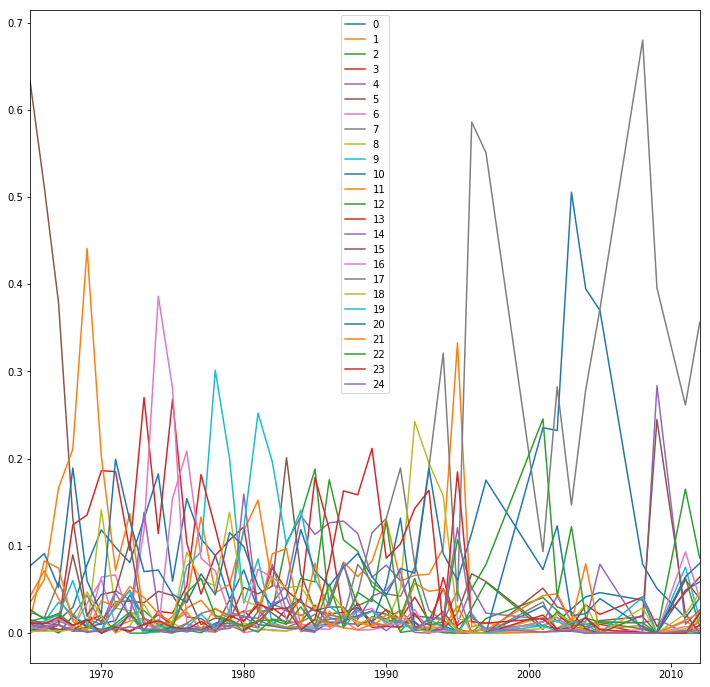

In [63]:
%matplotlib inline

res.transpose().plot(figsize=(12,12))